In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras import optimizers


# Loading the data

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



In [3]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Planning hyperparameter tuning

With deep learning using a full ANN network there are a lot of parameters to tune, the number of layers, the number of nodes at each layer, the activation function to use at each layer, the optimizer used and the learning rate for gradient descent, the loss function used, the batch size, the number of epochs and probably more.  

My plan, which may not be optimal:
* Start by determining how many layers, keeping everything else constant
* Given the number of layers, play with an equal amount of nuerons at each layer, a increasing amount of neurons at each layer, a decreasing amount of neurons at each layer, or an increasing then decreasing amount of neurons at each layer
* Play around with the activation function at each layer.
* Play around with batch size

Again this systematic method leaves a lot of options, some which may be better, out.  The order in which I tune hyperparameters also matters.   Again better models may be left out.

# Adjusting number of hidden layers

I am going to test, 2, 3, 5 hidden layers, maybe more if it continues to improve, each with 32 nodes, using relu as an activation function and having a batch size when training of 128 with 20 epochs.

## 2 layers

In [4]:
model = Sequential()
model.add(Dense(32,input_shape=[input_dim],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.2668 - accuracy: 0.5885
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7264 - accuracy: 0.7484
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6159 - accuracy: 0.7877
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.8084
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5250 - accuracy: 0.8189
Epoch 6/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.8271
Epoch 7/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.8319
Epoch 8/20
469/469 [==============================] - 0s 976us/step - loss: 0.4713 - accuracy: 0.8361
Epoch 9/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.8403
Epoch 10/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.84

<AxesSubplot:>

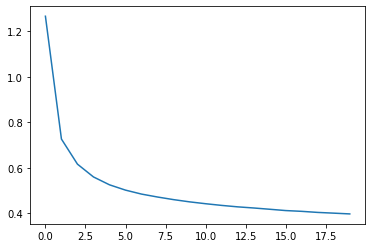

In [5]:
history1 = pd.DataFrame(history.history)
history1.loss.plot()

<AxesSubplot:>

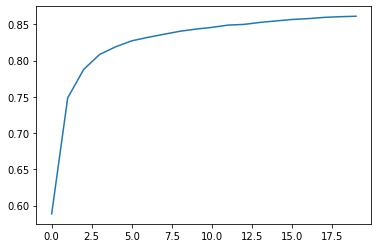

In [6]:
history1.accuracy.plot()

As you can see the loss steadily decreased and the accuracy steadily increased.  The training accuracy is 0.8574.  Looking at the test accuracy ...

In [7]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8482000231742859


There is not much difference between the train accuracy and the test accuracy, which suggests no overfitting

Testing 3 hidden layers...

In [8]:
model = Sequential()
model.add(Dense(32,input_shape=[input_dim],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.4081 - accuracy: 0.5269
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7567 - accuracy: 0.7280
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6291 - accuracy: 0.7815
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5679 - accuracy: 0.8016
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.8141
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5090 - accuracy: 0.8226
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4913 - accuracy: 0.8284
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4767 - accuracy: 0.8329
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4643 - accuracy: 0.8369
Epoch 10/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.8400

In [9]:
history2 = pd.DataFrame(history.history)


<AxesSubplot:>

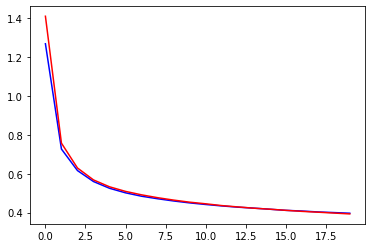

In [10]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')

<AxesSubplot:>

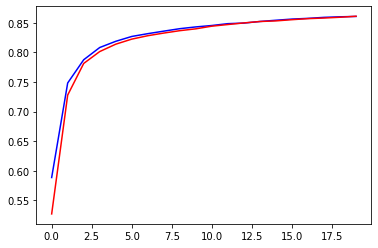

In [11]:
history1.accuracy.plot(color='blue')
history2.accuracy.plot(color='red')

In the end the loss was slightly less and the accuracy was slightly more than with 2 layers, however the decrease in loss and increase in accuracy was slower with 3 layers.  I would say stick with two layers.  

Testing 5 layers ...

In [12]:
model = Sequential()
model.add(Dense(32,input_shape=[input_dim],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.7682 - accuracy: 0.3972: 0s - loss: 2.1394 - accu
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.8364 - accuracy: 0.6734
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7024 - accuracy: 0.7350
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.7700
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5697 - accuracy: 0.7908
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.8088
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5032 - accuracy: 0.8231
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4842 - accuracy: 0.8292
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4713 - accuracy: 0.8326
Epoch 10/20
469/469 [==============================] - 1s 1ms/step - loss:

In [13]:
history3 = pd.DataFrame(history.history)

<AxesSubplot:>

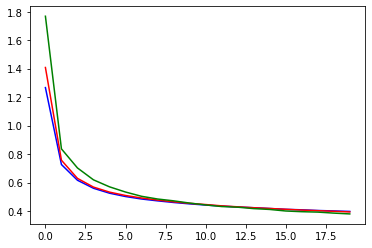

In [14]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')
history3.loss.plot(color='green')

Again the loss eventualy is lower but it is slower to reach that.  From comparing these graphs, I chose two hidden units.

## Adjusting the number of nodes

First I'm going to start with the same number of nodes at each layer, doubling each time.  16, 32, 64 ... Then when I chose the best number of  nodes, I'll play around with increasing or decreasing the number of nodes for the first layer.


In [15]:
model = Sequential()
model.add(Dense(16,input_shape=[input_dim],activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.3902 - accuracy: 0.5541
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7569 - accuracy: 0.7406
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6415 - accuracy: 0.7815
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5830 - accuracy: 0.7991
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5461 - accuracy: 0.8106
Epoch 6/20
469/469 [==============================] - ETA: 0s - loss: 0.5213 - accuracy: 0.81 - 0s 1ms/step - loss: 0.5211 - accuracy: 0.8170
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5026 - accuracy: 0.8236
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4889 - accuracy: 0.8278
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4779 - accuracy: 0.8320
Epoch 10/20
469/469 [==============================] - 1s 

In [16]:
history1 = pd.DataFrame(history.history)

<AxesSubplot:>

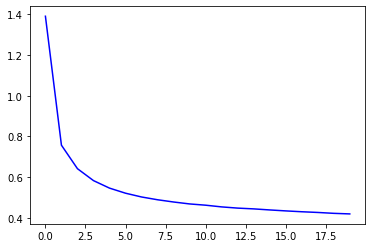

In [17]:
history1.loss.plot(color='blue')

<AxesSubplot:>

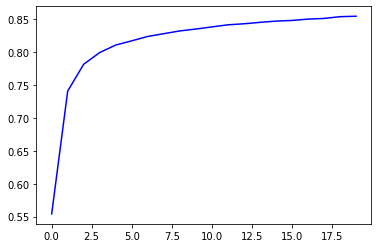

In [18]:
history1.accuracy.plot(color='blue')

Both improved steadily.  Looking at the test set accuracy.

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.836899995803833


Test accuracy is slightly lower, no overfitting or underfitting apparent.  Going to try 32 nodes.

In [20]:
model = Sequential()
model.add(Dense(32,input_shape=[input_dim],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.3089 - accuracy: 0.5938
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7158 - accuracy: 0.7590
Epoch 3/20
469/469 [==============================] - 0s 955us/step - loss: 0.6139 - accuracy: 0.7904
Epoch 4/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.8073
Epoch 5/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.8160
Epoch 6/20
469/469 [==============================] - 0s 991us/step - loss: 0.5076 - accuracy: 0.8236
Epoch 7/20
469/469 [==============================] - 0s 974us/step - loss: 0.4914 - accuracy: 0.8289
Epoch 8/20
469/469 [==============================] - 0s 957us/step - loss: 0.4776 - accuracy: 0.8335
Epoch 9/20
469/469 [==============================] - 0s 987us/step - loss: 0.4665 - accuracy: 0.8368
Epoch 10/20
469/469 [==============================] - 0s 985us/step - loss: 0.4566 - accu

In [21]:
history2 = pd.DataFrame(history.history)

<AxesSubplot:>

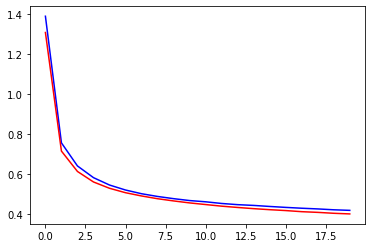

In [23]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')

<AxesSubplot:>

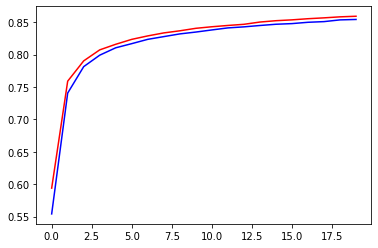

In [24]:
history1.accuracy.plot(color='blue')
history2.accuracy.plot(color='red')

32 nodes was an imporovement as can be seen by the graph, going to try 64.

In [25]:
model = Sequential()
model.add(Dense(64,input_shape=[input_dim],activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.1836 - accuracy: 0.6164
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.7630
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5947 - accuracy: 0.7975
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5438 - accuracy: 0.8145
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5133 - accuracy: 0.8227
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4934 - accuracy: 0.8286
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4771 - accuracy: 0.8336
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4645 - accuracy: 0.8385
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4551 - accuracy: 0.8404
Epoch 10/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4457 - accuracy: 0.8443

In [26]:
history3 = pd.DataFrame(history.history)

<AxesSubplot:>

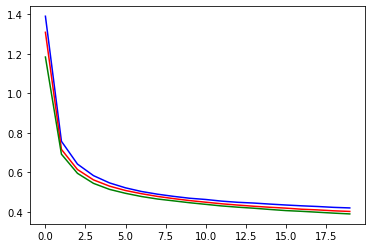

In [27]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')
history3.loss.plot(color='green')

<AxesSubplot:>

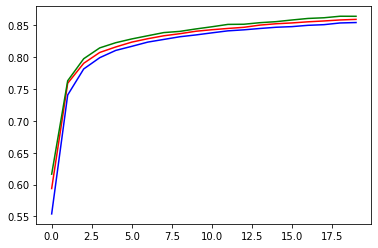

In [28]:
history1.accuracy.plot(color='blue')
history2.accuracy.plot(color='red')
history3.accuracy.plot(color='green')

Again, an improvement.  Checking the accuracy on the test set.

In [29]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8416000008583069


The accuracy increased although the difference between the training test and test set accuracy has also increased.  I do not feel there is overfitting yet, but I will watch for this.  Trying 128 nodes.

In [30]:
model = Sequential()
model.add(Dense(128,input_shape=[input_dim],activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.1439 - accuracy: 0.6477
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6647 - accuracy: 0.7792
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5742 - accuracy: 0.8074
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.8196
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5001 - accuracy: 0.8280
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.8339
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4650 - accuracy: 0.8389
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4528 - accuracy: 0.8431
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.8457
Epoch 10/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.8494

In [31]:
history4 = pd.DataFrame(history.history)

<AxesSubplot:>

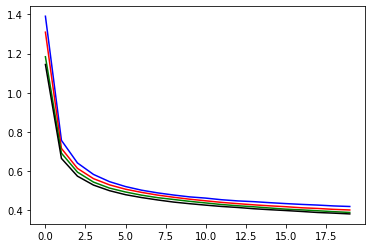

In [32]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')
history3.loss.plot(color='green')
history4.loss.plot(color='black')

<AxesSubplot:>

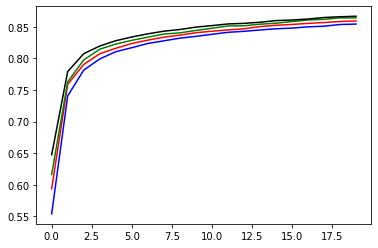

In [33]:
history1.accuracy.plot(color='blue')
history2.accuracy.plot(color='red')
history3.accuracy.plot(color='green')
history4.accuracy.plot(color='black')

The increase in accuracy and decrease in loss seem to be settling down.  Testing the accuracy on the test set...

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8485000133514404


The difference between training accuracy and testing accuracy has decreased.  128 seems to be a good number for the number of nodes.  Checking 256....

In [35]:
model = Sequential()
model.add(Dense(256,input_shape=[input_dim],activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0405 - accuracy: 0.6907
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6316 - accuracy: 0.7932
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.8158
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5130 - accuracy: 0.8256
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.8320
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4697 - accuracy: 0.8375
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.8414
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.8450
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4347 - accuracy: 0.8493
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8511

In [36]:
history5 = pd.DataFrame(history.history)

<AxesSubplot:>

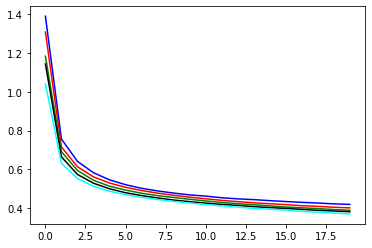

In [38]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')
history3.loss.plot(color='green')
history4.loss.plot(color='black')
history5.loss.plot(color='cyan')

<AxesSubplot:>

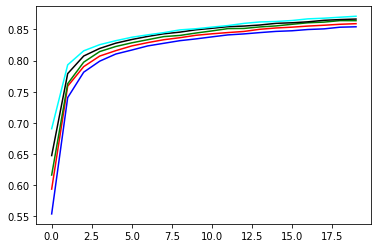

In [39]:
history1.accuracy.plot(color='blue')
history2.accuracy.plot(color='red')
history3.accuracy.plot(color='green')
history4.accuracy.plot(color='black')
history5.accuracy.plot(color='cyan')

It still looks like the model is improving, however training time took longer.  As there is not a substantial difference in loss or accuracy I may choose 128 as the number of nodes per layer.  However, checking the test set accuracy with 256.

In [40]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8514999747276306


Although the accuracy has improved, there is a slight increase in the difference between training and test accuracy.  Also, given the time difference, I choose to stick with 128 nodes each layer.

Next, I will keep dense layer 2 at 128 nodes and vary the number of nodes in the first layer and see if there is any change.

In [48]:
history = []
test_accuracy = []
for x in [16,32,64,128,256,512,1024]:
    model = Sequential()
    model.add(Dense(x,input_shape=[input_dim],activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
    h = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0)
    history.append(h.history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_accuracy.append(score[1])


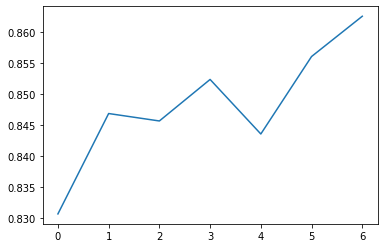

In [49]:
plt.plot(test_accuracy)

The test accuracy increased fast but then decreased.  The best values are nodes are 32 or nodes are 256 or more.  Looking at the training accuracy

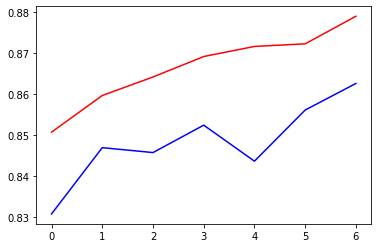

In [50]:
training_accuracy = [x['accuracy'][-1] for x in history]
plt.plot(training_accuracy, color='red')
plt.plot(test_accuracy, color='blue')

The training accuracy increases.  Looking at the difference between accuracies.

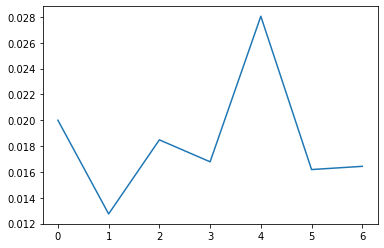

In [51]:
plt.plot(np.array(training_accuracy)-np.array(test_accuracy))

The difference is the least when x=1, which was when the first layer had 32 nodes.  Keeping the first layer as 32 nodes and the second layer at 128 nodes.

# Adjusting activation function

Playing around with the activation function at each layer, starting with the first layer.  Going to try tanh and relu then leaky relu.

In [53]:
history = []
test_accuracy = []
for activation in ['tanh','relu']:
    model = Sequential()
    model.add(Dense(32,input_shape=[input_dim], activation=activation))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
    h = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0)
    history.append(h.history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_accuracy.append(score[1])

In [54]:
test_accuracy

[0.8428999781608582, 0.8409000039100647]

In [56]:
training_accuracy = [x['accuracy'][-1] for x in history]
training_accuracy

[0.8619333505630493, 0.8590333461761475]

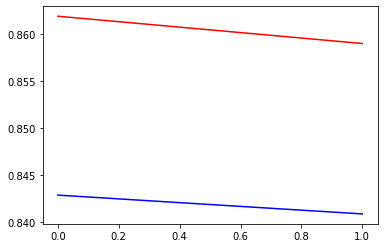

In [57]:
plt.plot(test_accuracy,color='blue')
plt.plot(training_accuracy,color='red')

Both accuracy degrease with relu.  It looks like tanh might be best for the first layer, but going t next try leakyrelu with different values.

In [59]:
history = []
test_accuracy = []
for alpha in [0.1,0.2,0.3]:
    model = Sequential()
    model.add(Dense(32,input_shape=[input_dim]))
    model.add(LeakyReLU(alpha=alpha))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
    h = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0)
    history.append(h.history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_accuracy.append(score[1])

In [60]:
test_accuracy

[0.8374000191688538, 0.847599983215332, 0.8414000272750854]

In [61]:
training_accuracy = [x['accuracy'][-1] for x in history]
training_accuracy

[0.8582500219345093, 0.8583333492279053, 0.8577666878700256]

A leaky relu with an alpha of 0.2 had the highest test accuracy.  Going to now try adjusting the second activation.

In [62]:
history = []
test_accuracy = []
for activation in ['tanh','relu']:
    model = Sequential()
    model.add(Dense(32,input_shape=[input_dim]))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128,activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
    h = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0)
    history.append(h.history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_accuracy.append(score[1])

In [63]:
test_accuracy

[0.8472999930381775, 0.8436999917030334]

In [64]:
training_accuracy = [x['accuracy'][-1] for x in history]
training_accuracy

[0.8611500263214111, 0.8577499985694885]

Tanh performed best.  Going to try leaky relu

In [66]:
history = []
test_accuracy = []
for alpha in [0.1,0.2,0.3]:
    model = Sequential()
    model.add(Dense(32,input_shape=[input_dim]))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=alpha))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
    h = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0)
    history.append(h.history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_accuracy.append(score[1])

In [67]:
test_accuracy

[0.8492000102996826, 0.8388000130653381, 0.8389999866485596]

In [68]:
training_accuracy = [x['accuracy'][-1] for x in history]
training_accuracy

[0.8599833250045776, 0.8565166592597961, 0.8559333086013794]

A leaky relu with alpa 0.1 performed better than tanh

# Adjusting batch size

In [70]:
history = []
test_accuracy = []
for batch in [1,16,32,64,128,256,512,1024,X_train.shape[0]]:
    model = Sequential()
    model.add(Dense(32,input_shape=[input_dim]))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
    h = model.fit(X_train, Y_train, batch_size=batch, epochs=20, verbose=0)
    history.append(h.history)
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_accuracy.append(score[1])

In [71]:
training_accuracy = [x['accuracy'][-1] for x in history]
training_accuracy

[0.899150013923645,
 0.895966649055481,
 0.8835499882698059,
 0.8698499798774719,
 0.8572499752044678,
 0.8403833508491516,
 0.8227166533470154,
 0.7910500168800354,
 0.22696666419506073]

In [72]:
test_accuracy

[0.8716999888420105,
 0.8704000115394592,
 0.8641999959945679,
 0.838699996471405,
 0.8414000272750854,
 0.8202000260353088,
 0.807200014591217,
 0.7796000242233276,
 0.23810000717639923]

A lower batch size performed better.  

There is a lot more than can be tested.  The method I used to hyperparameter tune left out a lot of possibilities.  When using deep learning I may want to see if I can impliment SciKit learn's GridSearchCV.  Also I took Kaggle's course on intro to deep learning course which covered batch normalization which is something I could try.  

The best model details:
* 2 hidden layers
* First hidden layer has 32 nodes and LeakyRelu as an activation function with an alpha of 0.2
* The second hidden layer has 128 nodes with LeakyRelu as an activation function with an alpha of 0.1
* With 20 epochs, a batch size of 1 performed best.